In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [2]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))


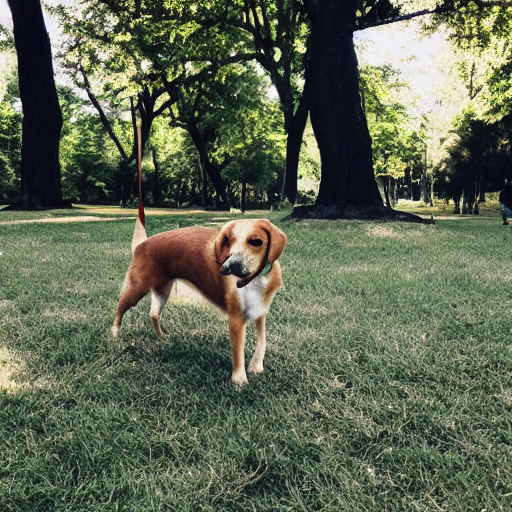

In [6]:
prompt = "a dog in a park"

result = get_completion(prompt)
IPython.display.HTML(f'<img src="data:image/png;base64,{result}" />')

In [4]:
import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt):
    output = get_completion(prompt)
    result_image = base64_to_pil(output)
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch(share=True, server_port=int(os.environ['PORT1']))

/usr/local/lib/python3.9/site-packages/gradio_client/documentation.py:105: UserWarning: Could not get documentation group for <class 'gradio.mix.Parallel'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")
/usr/local/lib/python3.9/site-packages/gradio_client/documentation.py:105: UserWarning: Could not get documentation group for <class 'gradio.mix.Series'>: No known documentation group for module 'gradio.mix'
  warnings.warn(f"Could not get documentation group for {cls}: {exc}")


Running on local URL:  https://0.0.0.0:7860
IMPORTANT: You are using gradio version 3.37.0, however version 4.44.1 is available, please upgrade.
--------

Could not create share link. Missing file: /usr/local/lib/python3.9/site-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.9/site-packages/gradio


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/gradio/routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.9/site-packages/gradio/blocks.py", line 1389, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.9/site-packages/gradio/blocks.py", line 1094, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.9/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 2144, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 851, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.9/site-packages/gradio/utils.py", line 704, in wrapper
    response = f(*args, **kwargs)
  Fil

In [7]:
demo.close()

Closing server running on port: 7860
